Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 359 images belonging to 10 classes.
Found 80 images belonging to 10 classes.
Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.1395 - loss: 2.4594 - val_accuracy: 0.1719 - val_loss: 2.1645
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.0938 - loss: 2.2282 - val_accuracy: 0.1250 - val_loss: 2.2491
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.2401 - loss: 2.0284 - val_accuracy: 0.5156 - val_loss: 1.5082
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 188ms/step - accuracy: 0.4062 - loss: 1.8015 - val_accuracy: 0.3750 - val_loss: 1.7442
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.5062 - loss: 1.4883 - val_accuracy: 0.5000 - val_loss: 1.5210
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5938 - loss: 1.1888 - val_accuracy: 0.4375 - val_loss: 0.9659
Epoch 7/10
11/11 ━━━━━━━━━━━

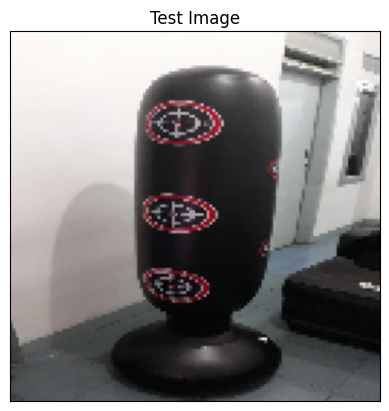

In [ ]:
!pip install tensorflow
!pip install matplotlib

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Mount your Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Set the path to your dataset on Google Drive (training folder)
dataset_path = '/content/drive/MyDrive/gym_equipment_recognition/training'

# Define parameters for image loading and preprocessing
img_height, img_width = 128, 128
batch_size = 32

# Create data generators for training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Build the CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 10
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

# Evaluate the model
loss, accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print("Validation Loss:", loss)
print("Validation Accuracy:", accuracy)

# Test the model with the provided image path
from tensorflow.keras.preprocessing import image

img_path = '/content/drive/MyDrive/gym_equipment_recognition/training/punching-bag/1.jpg'
img = image.load_img(img_path, target_size=(img_height, img_width))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.

prediction = model.predict(img_array)
predicted_class_index = np.argmax(prediction)

# Get class labels from the directory structure (sorted)
class_labels = sorted(os.listdir(dataset_path))

print("Predicted class:", class_labels[predicted_class_index])

plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()